In [42]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# load the dataset
H_DriverActivity = pd.read_csv('Hourly_DriverActivity_1.csv - Hourly_DriverActivity_1.csv')
H_OverviewSearch = pd.read_csv('Hourly_OverviewSearch_1.csv - Hourly_OverviewSearch_1.csv')


# Step 1: EDA and clean the dataset


<h4>1) Table 1: 
    Hourly Driver Activity</h4>

In [44]:
H_DriverActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     840 non-null    object 
 1   Active drivers           840 non-null    int64  
 2   Online (h)               840 non-null    int64  
 3   Has booking (h)          840 non-null    int64  
 4   Waiting for booking (h)  840 non-null    int64  
 5   Busy (h)                 840 non-null    int64  
 6   Hours per active driver  840 non-null    float64
 7   Rides per online hour    840 non-null    float64
 8   Finished Rides           795 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 59.2+ KB


- There are 45 null values in column **"Finished Rides"**.
- However, all the NaN values should have a value of 0. Therefore, the NaN value in column **"Finished Rides"** will be substituted by **0**, which will be handled in the latter part

<h4>2) Table 2: Hourly Overview Search</h4> 


In [45]:
H_OverviewSearch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         839 non-null    object
 1   People saw 0 cars (unique)   839 non-null    int64 
 2   People saw +1 cars (unique)  839 non-null    int64 
 3   Coverage Ratio (unique)      839 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.3+ KB


- There are no null values in table **H_OverviewSearch.** 

- However, there is 839 rows in <strong>H_OverviewSearch</strong> table. While the <strong>H_DriverActivity</strong> table has 840 rows, which meaning 1 day is missing in <strong>H_OverviewSearch</strong> table. After merging 2 tables can be merged, the missing date can be determinded.


#### 3) Merge 2 tables OverviewSearch and DriverActivity

In [46]:
# use outer join to make sure, the merge data will include all date in 2 tables
data = pd.merge(H_DriverActivity, H_OverviewSearch, how="outer", on="Date") 

In [47]:
data.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0


#### 4) Add date-related columns
Create additional columns related to day and time. This could be because these time-related columns can be used for better visuallization

In [48]:
# change column date to right date format 
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H')


In [49]:
#Create Month_of_year col
data.insert(1, "Month_of_year",data['Date'].dt.month)
#Create Week_of_year col
data.insert(2, "Week_of_year",data['Date'].dt.isocalendar().week)
# Create Day_of_week col
data.insert(3, "Day_of_week", data['Date'].dt.weekday)
# Create Day_name col
data.insert(4, "Day_name", data['Date'].dt.day_name())
#Create Hour_of_day col
data.insert(5, "Hour_of_day", data['Date'].dt.hour)

- Now we get the data set that have all columns needed for further analysis.

#### 5) Handle NaN values

As mentioned before, now we canfill nan value in column <strong>Finished Rides</strong> with <strong>0</strong>

In [50]:
data['Finished Rides'] = data['Finished Rides'].fillna(0)

- As metioned before,there is one missing row in <strong>H_OverviewSearch</strong> table needed to be handled.

- After merging 2 tables, we find out that the data for date <strong>"2016-12-07" at 5 a.m (Wednesday)</strong> is missing. 

- There are many way to handle missing value like <strong>deleting Rows</strong>, <strong>assigning An Unique Category</strong> or <strong>replacing with Mean/Median/Mode</strong>.

- In this case, the NaN value in date <strong>"2016-12-07" at 5 a.m </strong> will be fill in by the <strong>mean value</strong> calculated at <strong>5a.m every Wednesday</strong>. This could be a better method than removing the row.



In [51]:
# identify the row with null value
data[data['People saw 0 cars (unique)'].isna()]

,Date,Month_of_year,Week_of_year,Day_of_week,Day_name,Hour_of_day,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
282,2016-12-07 05:00:00,12,49,2,Wednesday,5,24,8,0,8,10,0.3,0.0,0.0,NaN,NaN,NaN


In [52]:
# fill the NaN value with the mean value
for i in range(-3,0):
    a = round(data[(data['Hour_of_day'] == 5) & (data['Day_name'] == 'Wednesday')].iloc[:,i].mean())
    data.iloc[:,i] = data.iloc[:,i].fillna(a)

In [53]:
# check that the missing data is now fullfilled
data[(data['Hour_of_day'] == 5) & (data['Day_name'] == 'Wednesday')]

,Date,Month_of_year,Week_of_year,Day_of_week,Day_name,Hour_of_day,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
114,2016-12-14 05:00:00,12,50,2,Wednesday,5,17,6,0,6,6,0.4,0.00,0.0,2.0,3.0,60.0
282,2016-12-07 05:00:00,12,49,2,Wednesday,5,24,8,0,8,10,0.3,0.00,0.0,4.0,7.0,80.0
450,2016-11-30 05:00:00,11,48,2,Wednesday,5,34,13,3,9,9,0.4,0.31,4.0,13.0,20.0,61.0
618,2016-11-23 05:00:00,11,47,2,Wednesday,5,26,12,0,11,6,0.5,0.00,0.0,0.0,3.0,100.0
786,2016-11-16 05:00:00,11,46,2,Wednesday,5,25,9,0,9,11,0.4,0.00,0.0,0.0,2.0,100.0


# Step 2: Define some key metrics

#### 1) Interpret the data

According to the details which go with the data set, it can be defined that:
    <li>**Online (h)** – total supply hours that were available during the time period
    <li>**Has booking (h)** – total hours during which drivers had a client booking (any state)
    <li>**Waiting for booking (h)** – total hours which drivers spent waiting for booking
    <li>**Busy (h)** – total hours which drivers were not available to take orders in


Actually, **Online** is equal to the sum of **Has booking** and **Waiting for booking**. However, when checking the data, the value of the **Online** column can be **equal or 1 hour greater/lower** than the sum of values of **Has booking** and **Waiting for booking** columns.
        
This could be because, when exporting data to CSV file, these numbers are ground up/down the nearest integer, leading to the inequation between the value of **Online** and the sum of the value of **Has booking** and **Waiting for booking**.
        
In the later part, **Has booking** will be used for calculating the Demand. To ensure the data unification, both columns **Has booking** and **Waiting for booking** should be used for further calculation.

#### 2) Calculate Demand and Supply

**Supply** is considered as a driver online hours which including time on a job (**Has booking**) and waiting time for a booking (**Waiting for booking**) 

**Demand** is considered as time customers on thier trips (**Has booking**) and time they can not search a driver  (**Busy**)

**Demand supply gap** is the difference between **Demand** and **Supply**

Therefore, Demand and Supply in this circumstance can be calculated as:<br>
<li> Demand = [Has booking (h)] + [Busy (h)]

<li> Supply = [Has booking (h)] + [Waiting for booking (h)]
        
<li> Demand supply gap = Demand - Supply

# Step 3: Deep dive and answer questions

In [54]:
# calculate the Demand, Supply and Demand_supply_gap columns
data['Demand'] = data['Has booking (h)'] + data['Busy (h)']
data['Supply'] = data['Has booking (h)'] + data['Waiting for booking (h)']
data['Demand_supply_gap'] = data['Busy (h)']-  data['Waiting for booking (h)']

# pivot table to get the average gap group by Day_of_week and Hour_of_day
Pivot_Gap = pd.pivot_table(data, values='Demand_supply_gap',columns='Day_of_week', index='Hour_of_day',
                    aggfunc=np.average)

#### 1)	Show which 36 hours in a week are most undersupplied


In [56]:
# calculate the average Demand_supply_gap group by Day_of_week, Day_name,Hour_of_day
gap_by_day_hours = data.groupby(['Day_of_week','Day_name','Hour_of_day'], sort=True).agg({'Demand_supply_gap': ['mean']}).reset_index()
gap_by_day_hours.columns = gap_by_day_hours.columns.droplevel(1)


- **The table showing top 36 undersupplied hours**

In [58]:
# top 36 hour
top_36_hours = gap_by_day_hours.sort_values(by ='Demand_supply_gap',ascending=False).nlargest(36,'Demand_supply_gap',keep='all')
print('Top 36 undersupplied hours')
top_36_hours

Top 36 undersupplied hours


,Day_of_week,Day_name,Hour_of_day,Demand_supply_gap
90,3,Thursday,18,8.8
66,2,Wednesday,18,8.6
42,1,Tuesday,18,7.0
89,3,Thursday,17,6.8
18,0,Monday,18,5.8
91,3,Thursday,19,4.6
67,2,Wednesday,19,4.0
8,0,Monday,8,3.8
9,0,Monday,9,3.8
152,6,Sunday,8,3.4


- **Visualize top 36 hour with the highest demand and supply gap**


Text(60.0, 0.5, 'Hour of day')

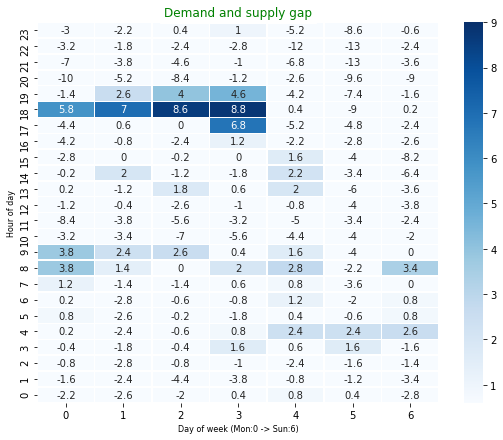

In [61]:

# create pivot table for visualization
gap_by_day_hours_pivot = gap_by_day_hours.pivot(index ='Hour_of_day', columns ='Day_of_week', values ='Demand_supply_gap')\
                        .sort_values(by ='Hour_of_day',ascending=False)


# Default heatmap
fig, ax = plt.subplots(figsize=(9, 7))

title = 'Demand and supply gap'
plt.title(title, fontsize=12,
          backgroundcolor='White',
          color='Green')


p1 = sns.heatmap(gap_by_day_hours_pivot, cmap="Blues",linewidths=.5,linecolor='white',vmin=.6, vmax=9, annot=True)

plt.xlabel('Day of week (Mon:0 -> Sun:6)', fontsize = 8) 
plt.ylabel('Hour of day', fontsize = 8)

It is clear that the **Demand_supply_gap** was high in a time of **peak hour**. 
36 hours with the most undersupplied are allocated mostly in the peak hours. In more detail:

**Weekdays:**

- Weekday morning peak hour 7 am – 9 am.

- Weekday evening peak hour 5 pm - 7 pm. 

Usually, most organizations’ work hours start between 8 am and 9 am and end between 5 PM - 6 PM. Therefore, during the weekday, demand is higher during these times as people commute to work or go back to home. However, on Friday, people leave companies early, leading to higher demand from 1 pm to 3 pm.

**Weekends:**

- Friday, Saturday, and Sunday: 3 am – 4 am.

- Sunday 8 am.

It is interesting that people have higher demand on weekends from 3 am and 4 am. It could be because of the nightlife. For example, people can go to their favorite bars without driving themselves. There are no worries about drunk driving dangers. Hence, booking a car is better than self-driving. 

Also, on Sunday, around 8 am, the demand is also high. There are many reasons for this trend. This could be because people need to leave the city after their visit or people need a ride to visit their parents, friends, so on. More data need to be collected to prove the hypothesis.


#### 2)	The 24-hour curve of average supply and demand (to illustrate match/mismatch).


In [62]:
# create supply and demand data
demand_suply = data[['Hour_of_day','Supply','Demand']]

# calculate average of demnand and supply by hours
demand_suply_by_hour = data.groupby('Hour_of_day', sort=True).agg({'Demand': ['mean'],'Supply':['mean']}).reset_index()
demand_suply_by_hour.columns = demand_suply_by_hour.columns.droplevel(1)
demand_suply_by_hour= demand_suply_by_hour.set_index('Hour_of_day')



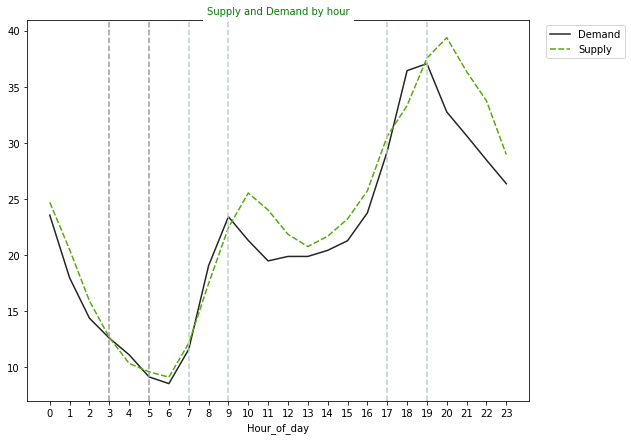

In [67]:
# visualize data
fig, ax = plt.subplots(figsize=(9, 7))

title = 'Supply and Demand by hour'
plt.title(title, fontsize=10,
          backgroundcolor='White',
          color='Green')
ax.set_xticks(range(len(demand_suply_by_hour)))

lp = sns.lineplot(data=demand_suply_by_hour, palette='dark:#5A15')
lp.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.axvline(x = 3, color = '#9c9c9c',linestyle ="--")
plt.axvline(x = 5, color = '#9c9c9c',linestyle ="--")
plt.axvline(x = 7, color = '#C1CDCD',linestyle ="--")
plt.axvline(x = 9, color = '#C1CDCD',linestyle ="--")
plt.axvline(x = 17, color = '#C1CDCD',linestyle ="--")
plt.axvline(x = 19, color = '#C1CDCD',linestyle ="--")

plt.show()

As can be seen from the line chart above, there are some hours during that the demand is over the supply.

- **Morning Rush (7 am to 9 am):** the time when people commute to work. So, the number of bookings is over the supply capacity.

- **Back to Home (5 pm to 7 pm):** people leave work between the hours of 5 pm - 7 pm, the demand surge during this period.

- **Afterparty (3 am to 5 am):** there is a time in the early morning that people book more trips than the supply capacity. This can be explained by looking at the figure in **Question 1** which shows people have a high tendency to use the service on weekends.

Overall, the gap between supply and demand by **hours in a day** also shares the same trend with the supply and demand gap by **hours and day of week** in **questions 1**, which is always undersupplied during peak hour.

On the other hand, the supply is much higher than the demand from **10 am to 5 pm** and from **7 pm to 11 pm**. This could be because the demand is not high during these hours, or the number of active drivers is high. The last part of this analysis will answer this question.

#### 3.	Visualization of hours where we lack supply during a weekly period. This one we can send to drivers to show when to online for extra hours.

Actually, the chart from question 1 can be reused to answer this question. But it needs to be modified **the values to anchor the colormap**, which will be range from 0 to 2. It can highlight the hours that need more drivers, helping the driver easy to interpret the chart. 

Also, **color** is switched to **Bolt color**.

Text(60.0, 0.5, 'Hour of day')

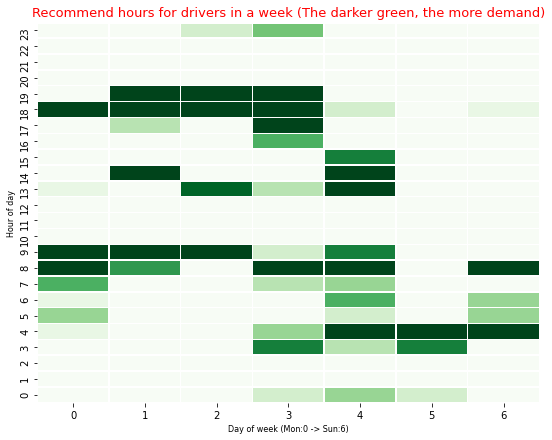

In [70]:
# Default heatmap
fig, ax = plt.subplots(figsize=(9, 7))

title = 'Recommend hours for drivers in a week (The darker green, the more demand)'
ax.set_title(title,fontsize=13,
          backgroundcolor='White',
          color='Red')


p1 = sns.heatmap(gap_by_day_hours_pivot, cmap="Greens",linewidths=.5,linecolor='white', annot_kws={'fontsize':8},vmin=0,cbar=False,
                vmax=2)

plt.xlabel('Day of week (Mon:0 -> Sun:6)', fontsize = 8) 
plt.ylabel('Hour of day', fontsize = 8)

#### 4)	Estimate the number of hours needed to ensure we have a high Coverage Ratio during most peak hours.

The Coverage Ratio can be calculated base on the number of people saw 0 car and saw +1 car. 

- **Coverage Ratio** = [People saw +1 cars] / sum( [People saw 0 cars],[People saw +1 cars] )

**Coverage Ratio** is based on the number of unique people. However, it needs to calculate the number of hours to ensure a high **Coverage Ratio** during most peak hours. Therefore, to solve this problem, it is necessary to find out the relationship between the number of hours (**the demand and supply gap**) and **Coverage Ratio**

It can be hypothesized that the relationship between **The Coverage Ratio** and **The Demand and Supply Gap** is a negative relationship. The regression model can be applied here to find out the parameters that can present the relationship between 2 variables.

**The scatter chart** below illustrates the relationship between **The Coverage Ratio** and **The Demand and Supply Gap**.



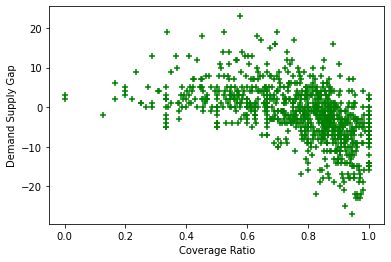

In [73]:
data['Coverage Ratio']= data['People saw +1 cars (unique)']/(data['People saw 0 cars (unique)'] + data['People saw +1 cars (unique)'])
%matplotlib inline
plt.xlabel('Coverage Ratio')
plt.ylabel('Demand Supply Gap')
plt.scatter(data[['Coverage Ratio']],data[['Demand_supply_gap']],color='green',marker='+')

- When **the demand and supply gap** is under 0, **The Coverage Ratio** usually be higher than 60%. 

- Next, find a model that can fit the data. In this case, polynomial regression will be used to find a curve that fit the dataset.


In [74]:
# import libaries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# polynomial regression degree = 1
poly = PolynomialFeatures(degree=2, include_bias=False)
# , include_bias=False

In [75]:
poly_features = poly.fit_transform(data[['Coverage Ratio']])
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, data[['Demand_supply_gap']])
y_predicted = poly_reg_model.predict(poly_features)


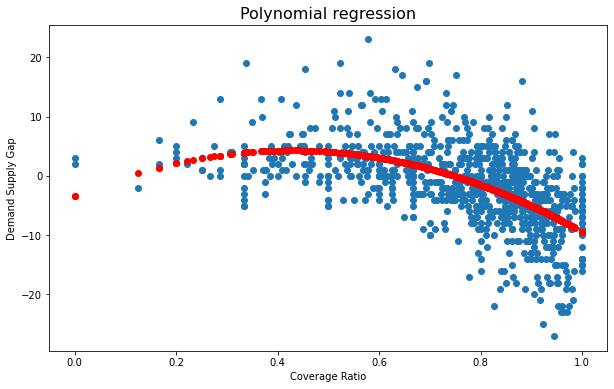

In [77]:
plt.figure(figsize=(10, 6))
plt.title("Polynomial regression", size=16)
plt.scatter(data[['Coverage Ratio']], data[['Demand_supply_gap']])
plt.scatter(data[['Coverage Ratio']], y_predicted, c="red")
plt.xlabel('Coverage Ratio')
plt.ylabel('Demand Supply Gap')
plt.show()

In [78]:
y_actual = np.array(list(data['Demand_supply_gap']))
y_pred = np.array(y_predicted)

In [79]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
print('R Squared:', metrics.r2_score(y_actual, y_pred))

Root Mean Squared Error: 5.904837665059348
R Squared: 0.3194891259811389


With **Root Mean Squared Error** is about 5.9 and **R Square** is around 0.32, it is not a good model that can explain the relationship between **Demand supply gap** and **Coverage Ratio**. However, with the limitation of the dataset in these circumstances. The model is acceptable.

- Final polynomial model: 

In [82]:
print('Demand_supply_gap= ',str(poly_reg_model.coef_ [0,1]),'* (Coverage Ratio)^2 ', poly_reg_model.coef_ [0,0],'* (Coverage Ratio) ',str(poly_reg_model.intercept_[0]))

Demand_supply_gap=  -42.00359290993346 * (Coverage Ratio)^2  36.007141083571824 * (Coverage Ratio)  -3.426853331183338


The result from question 1 shows that **36 hours with the most undersupplied are allocated mostly in the peak hours**. In order to estimate the number of hours needed to ensure we have a high Coverage Ratio during most peak hours, these **36 hours** need to have 100% Coverage Ratio.

Firstly, calculating how many hours to get the cover ratio of 100%. Then multiply that number with 36 peak-hour periods.

In [85]:
# with cover ratio is 100%
a = poly_reg_model.coef_ [0,1]*((1)**2) + poly_reg_model.coef_ [0,0]*(1) + poly_reg_model.intercept_

print('Total hours that needed to have highest coverage ratio among top 36 most peak hour based on the polynomial model:',\
      round(abs(a[0]*36)), 'hours')


Total hours that needed to have highest coverage ratio among top 36 most peak hour based on the polynomial model: 339 hours


#### 5)	Calculate levels of guaranteed hourly earnings we can offer to drivers during 36 weekly hours with the highest demand without losing money + how many extra hours we want to get to capture missed demand.

**Calculate RPH for each hour that ensure the hourly earnings we can offer to drivers during 36 weekly hours with the highest demand without losing money**

In [89]:
# calculate the average RPH group by Day_of_week, Day_name, Hour_of_day
RPH_by_day_hours = data.groupby(['Hour_of_day','Day_of_week','Day_name'], sort=True).agg({'Rides per online hour': ['mean']}).reset_index()
RPH_by_day_hours.columns = RPH_by_day_hours.columns.droplevel(1)

# create pivot table for calculation and visualization
RPH_by_day_hours_pivot = RPH_by_day_hours.pivot(index ='Hour_of_day', columns ='Day_of_week', values ='Rides per online hour')\
                        .sort_values(by ='Hour_of_day',ascending=False)

**Calculate the min RPH base on RPH over 3 hour periods**

In [90]:
# Rolling in 3 hours periods to get the min RPH
for i in range(0,7):
    s = RPH_by_day_hours_pivot[i].rolling(3,min_periods=1).min()
    RPH_by_day_hours_pivot['min RPH ' + str(i)] = s


**Now, we have table with min RPH base on 3 hours period.**


In [91]:
RPH_by_day_hours_pivot.head(10)

Day_of_week,0,1,2,3,4,5,6,min RPH 0,min RPH 1,min RPH 2,min RPH 3,min RPH 4,min RPH 5,min RPH 6
Hour_of_day,,,,,,,,,,,,,,
23,0.534,0.790,1.042,1.042,0.722,0.636,0.718,0.534,0.790,1.042,1.042,0.722,0.636,0.718
22,0.542,0.696,0.822,0.808,0.536,0.512,0.764,0.534,0.696,0.822,0.808,0.536,0.512,0.718
21,0.512,0.750,0.666,0.854,0.676,0.544,0.706,0.512,0.696,0.666,0.808,0.536,0.512,0.706
20,0.440,0.590,0.550,0.772,0.848,0.736,0.492,0.440,0.590,0.550,0.772,0.536,0.512,0.492
19,0.652,0.834,0.900,0.918,0.712,0.654,0.696,0.440,0.590,0.550,0.772,0.676,0.544,0.492
18,0.916,0.956,0.940,1.004,0.820,0.448,0.676,0.440,0.590,0.550,0.772,0.712,0.448,0.492
17,0.504,0.718,0.610,0.802,0.722,0.490,0.728,0.504,0.718,0.610,0.802,0.712,0.448,0.676
16,0.392,0.370,0.354,0.576,0.586,0.536,0.696,0.392,0.370,0.354,0.576,0.586,0.448,0.676
15,0.246,0.322,0.342,0.396,0.768,0.450,0.388,0.246,0.322,0.342,0.396,0.586,0.450,0.388


**Calculate the guaranteed hourly earnings based on min PRH and demand_supply_gap**

- **Firstly, merge table with new RPH (base on 3 hours period) with table that has Supply and Demand gap.**

In [97]:
# table with demand and supply gap
gap = gap_by_day_hours.pivot(index ='Hour_of_day', columns ='Day_of_week', values ='Demand_supply_gap')\
                        .sort_values(by ='Hour_of_day',ascending=False)

In [98]:
# Merge 2 tables
RPH_gap = pd.merge(RPH_by_day_hours_pivot, gap, how="left",left_on='Hour_of_day',right_on='Hour_of_day',\
                   suffixes=('_RPH', '_Gap')) 

In [99]:
RPH_gap.head()

Day_of_week,0_RPH,1_RPH,2_RPH,3_RPH,4_RPH,5_RPH,6_RPH,min RPH 0,min RPH 1,min RPH 2,...,min RPH 4,min RPH 5,min RPH 6,0_Gap,1_Gap,2_Gap,3_Gap,4_Gap,5_Gap,6_Gap
Hour_of_day,,,,,,,,,,,,,,,,,,,,,
23,0.534,0.790,1.042,1.042,0.722,0.636,0.718,0.534,0.790,1.042,...,0.722,0.636,0.718,-3.0,-2.2,0.4,1.0,-5.2,-8.6,-0.6
22,0.542,0.696,0.822,0.808,0.536,0.512,0.764,0.534,0.696,0.822,...,0.536,0.512,0.718,-3.2,-1.8,-2.4,-2.8,-11.6,-12.8,-2.4
21,0.512,0.750,0.666,0.854,0.676,0.544,0.706,0.512,0.696,0.666,...,0.536,0.512,0.706,-7.0,-3.8,-4.6,-1.0,-6.8,-13.2,-3.6
20,0.440,0.590,0.550,0.772,0.848,0.736,0.492,0.440,0.590,0.550,...,0.536,0.512,0.492,-10.4,-5.2,-8.4,-1.2,-2.6,-9.6,-9.0
19,0.652,0.834,0.900,0.918,0.712,0.654,0.696,0.440,0.590,0.550,...,0.676,0.544,0.492,-1.4,2.6,4.0,4.6,-4.2,-7.4,-1.6


- **Secondly, calculate the additional Finished Rides by multiply new RPH with Supply and demand gap.**

In [100]:
RPH_gap_shorten = RPH_gap.iloc[0:,7:]

for i in range(0,7):
    RPH_gap_shorten["additional Finished Rides "+ str(i)] = abs(RPH_gap_shorten.iloc[:,i]*RPH_gap_shorten.iloc[:,i+7])

- **Now, we have a table have information about the minimum additional Finish Rides if driver work in these extra hours**

In [101]:
additional_Finish_ride = RPH_gap_shorten.iloc[:,-7:]
additional_Finish_ride.head()

Day_of_week,additional Finished Rides 0,additional Finished Rides 1,additional Finished Rides 2,additional Finished Rides 3,additional Finished Rides 4,additional Finished Rides 5,additional Finished Rides 6
Hour_of_day,,,,,,,
23,1.6020,1.7380,0.4168,1.0420,3.7544,5.4696,0.4308
22,1.7088,1.2528,1.9728,2.2624,6.2176,6.5536,1.7232
21,3.5840,2.6448,3.0636,0.8080,3.6448,6.7584,2.5416
20,4.5760,3.0680,4.6200,0.9264,1.3936,4.9152,4.4280
19,0.6160,1.5340,2.2000,3.5512,2.8392,4.0256,0.7872


- **Visuallize the data**

Text(1032.3913043478262, 0.5, 'Hour of day')

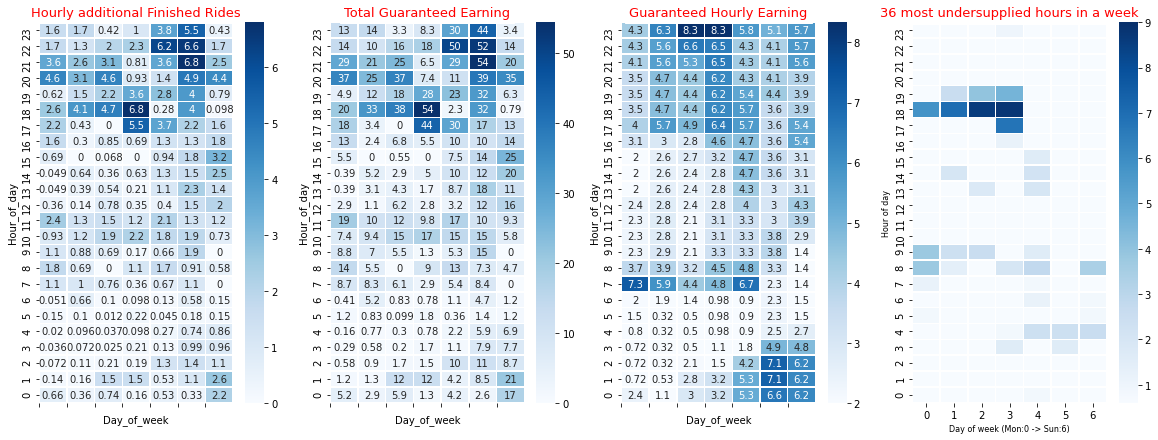

In [103]:
fig, ax = plt.subplots(1, 4, figsize=(20, 7))

# p1
title1 = 'Hourly additional Finished Rides'
plt.title(title, fontsize=10,
          backgroundcolor='White',
          color='Green')

p1 = sns.heatmap(additional_Finish_ride,ax=ax[0], cmap="Blues",linewidths=.5,linecolor='white',
                      annot=True)

ax[0].set_title(title1,fontsize=13,
          backgroundcolor='White',
          color='Red')
ax[0].set_xticks([0,1,2,3,4,5,6])

plt.xlabel('Day of week (Mon:0 -> Sun:6)', fontsize = 8) 
plt.ylabel('Hour of day', fontsize = 8)

# p2
title2 = 'Total Guaranteed Earning'
p2 = sns.heatmap(additional_Finish_ride*8,ax=ax[1], cmap="Blues",linewidths=.5,linecolor='white',
                      annot=True)
ax[1].set_title(title2,fontsize=13,
          backgroundcolor='White',
          color='Red')

ax[1].set_xticks([0,1,2,3,4,5,6])
plt.xlabel('Day of week (Mon:0 -> Sun:6)', fontsize = 8) 
plt.ylabel('Hour of day', fontsize = 8)

# p3
title3 = 'Guaranteed Hourly Earning'
p3 = sns.heatmap(RPH_gap_shorten.iloc[:,0:7]*8,ax=ax[2], cmap="Blues",linewidths=.5,linecolor='white',vmin=2,
                      annot=True)
ax[2].set_title(title3,fontsize=13,
          backgroundcolor='White',
          color='Red')

ax[2].set_xticks([0,1,2,3,4,5,6])
plt.xlabel('Day of week (Mon:0 -> Sun:6)', fontsize = 8) 
plt.ylabel('Hour of day', fontsize = 8)

# p4 - peak hour
title4 = '36 most undersupplied hours in a week'
ax[3].set_title(title4,fontsize=13,
          backgroundcolor='White',
          color='Red')

p4 = sns.heatmap(gap_by_day_hours_pivot, cmap="Blues",ax=ax[3],linewidths=.5,linecolor='white',vmin=.6, vmax=9)

plt.xlabel('Day of week (Mon:0 -> Sun:6)', fontsize = 8) 
plt.ylabel('Hour of day', fontsize = 8)

- Based on **Guaranteed Hourly Earning** and **36 hours in a week are most undersupplied** heat maps aboved, company can recommend a guaranteed hourly earnings they can offer to drivers during 36 weekly hours with the highest demand.

**How many extra hours we want to get to capture missed demand**
- Extra hours we want to get to capture missed demand: 102 hours



In [37]:
round(top_36_hours.Demand_supply_gap.sum())

102

#### Lastly, we will find out what the hours of oversupply? Can we shift some of them to undersupply hours?

In [105]:
data.columns

Index(['Date', 'Month_of_year', 'Week_of_year', 'Day_of_week', 'Day_name',
       'Hour_of_day', 'Active drivers', 'Online (h)', 'Has booking (h)',
       'Waiting for booking (h)', 'Busy (h)', 'Hours per active driver',
       'Rides per online hour', 'Finished Rides', 'People saw 0 cars (unique)',
       'People saw +1 cars (unique)', 'Coverage Ratio (unique)', 'Demand',
       'Supply', 'Demand_supply_gap', 'Coverage Ratio'],
      dtype='object')

In [107]:
# calculate the average Active drivers group by Day_of_week, Day_name,Hour_of_day
driver_by_day_hours = data.groupby(['Day_of_week','Day_name','Hour_of_day'], sort=True).agg({'Active drivers': ['mean']}).reset_index()
driver_by_day_hours.columns = driver_by_day_hours.columns.droplevel(1)
driver_by_day_hours_pivot = driver_by_day_hours.pivot(index ='Hour_of_day', columns ='Day_of_week', values ='Active drivers')\
                        .sort_values(by ='Hour_of_day',ascending=False)

Text(0.5, 1.0, 'Active drivers by hours')

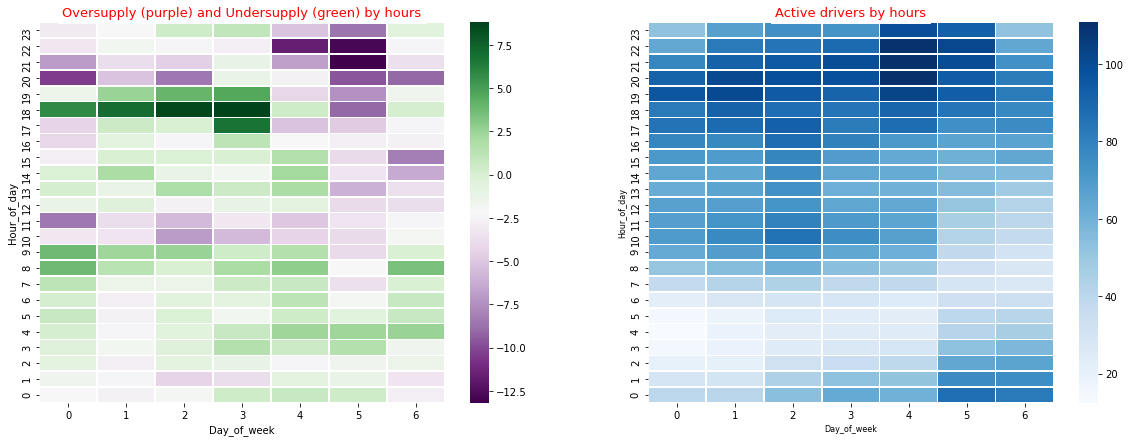

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

p1 = sns.heatmap(gap_by_day_hours_pivot, ax=ax[0], cmap="PRGn",linewidths=.5,linecolor='white', annot_kws={'fontsize':8},
#                  vmin=0,cbar=False,
#                 vmax=2
                )
ax[0].set_title('Oversupply (purple) and Undersupply (green) by hours',fontsize=13,
          backgroundcolor='White',
          color='Red')

plt.xlabel('Day of week (Mon:0 -> Sun:6)', fontsize = 8) 
plt.ylabel('Hour of day', fontsize = 8)

p2 = sns.heatmap(driver_by_day_hours_pivot, ax=ax[1], cmap="Blues",linewidths=.5,linecolor='white', annot_kws={'fontsize':8})
ax[1].set_title('Active drivers by hours',fontsize=13,
          backgroundcolor='White',
          color='Red')

In [110]:
top_36_hours_over_suppy = gap_by_day_hours.sort_values(by ='Demand_supply_gap',ascending=True).nsmallest(36,'Demand_supply_gap',keep='all')

print('Top 10 oversupplied hours')
top_36_hours_over_suppy.head(10)

Top 10 oversupplied hours


,Day_of_week,Day_name,Hour_of_day,Demand_supply_gap
141,5,Saturday,21,-13.2
142,5,Saturday,22,-12.8
118,4,Friday,22,-11.6
20,0,Monday,20,-10.4
140,5,Saturday,20,-9.6
164,6,Sunday,20,-9.0
138,5,Saturday,18,-9.0
143,5,Saturday,23,-8.6
11,0,Monday,11,-8.4
68,2,Wednesday,20,-8.4


The heat map **Oversupply (purple) and Undersupply (green) by hours** show the distribution of undersupplied and oversupply hours. 

- Most of the oversupply hours will be allocated from 10 am to 11 am during weekdays and 8 pm to 9 pm. All these hours are after the peak hours.  This could be because the demand after peak hour decreased significantly, or the number of drivers increased or both of them (Question 2). However, when looking at the heat map **Active drivers by hour**. The number of drivers during peak hour and after peak hour remain the same or just fluctuate in a small range. **Hence, we can conclude that many drivers still active after peak hours while the demand decrease, leading to the oversupply hours.**

- On the other hand, **most of the oversupplied hours will range from 7 pm to 23 pm on weekends**. The number of active drivers is also high during these hours. However, **the most undersupplied hours on weekends is from 3 am – 4 am (Friday, Saturday, and Sunday) and 8 am (Sunday)**. There are not too many drivers active during this time. It is reasonable that drivers do not want to wake up and go to work at 3 am.

Theoretically, **we can shift some supply to necessary hours**. 

However, we need more data to prove that we have enough of the unique drivers for peak hours. For example, on Monday evening, we want to shift an active driver A from 8 pm to 9 pm to peak hours of 6 pm to 7 pm. But there is no data to prove that he did not work from 6 pm to 7 pm. The better solution is that we can recommend a driver who never works in peak hours of 6 pm to 7 pm to active early. By doing this, we can cover the gap during peak hours.

Therefore, I would recommend we can collect more data to solve allocation problems.

Besides, drivers are not willing to go out on "tough" hours like 3 am Sundays. However, we can offer them an attractive incentive that can motivate them to work.